MNIST DATASET CLASSIFICATION

In [1]:
import numpy as np
from tensorflow.keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
from tensorflow import keras 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [4]:
x_train[1,:,:]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [7]:
y_train[1]

0

In [8]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [9]:
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
batch_size = 128
num_classes = 10
epochs = 30
input_shape = (28, 28, 1)

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


In [19]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=60,verbose=1,validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 24s 51ms/step - loss: 1.5279 - accuracy: 0.5036 - val_loss: 1.2541 - val_accuracy: 0.7487
Epoch 2/10
469/469 [==============================] - 35s 75ms/step - loss: 1.4980 - accuracy: 0.5122 - val_loss: 1.2195 - val_accuracy: 0.7537
Epoch 3/10
469/469 [==============================] - 36s 77ms/step - loss: 1.4698 - accuracy: 0.5194 - val_loss: 1.1860 - val_accuracy: 0.7618
Epoch 4/10
469/469 [==============================] - 35s 75ms/step - loss: 1.4502 - accuracy: 0.5275 - val_loss: 1.1543 - val_accuracy: 0.7675
Epoch 5/10
469/469 [==============================] - 33s 70ms/step - loss: 1.4201 - accuracy: 0.5366 - val_loss: 1.1239 - val_accuracy: 0.7752
Epoch 6/10
469/469 [==============================] - 34s 72ms/step - loss: 1.3991 - accuracy: 0.5437 - val_loss: 1.0940 - val_accuracy: 0.7801
Epoch 7/10
469/469 [==============================] - 33s 71ms/step - loss: 1.3763 - accuracy: 0.5501 - val_loss: 1.0648 - val_accuracy:

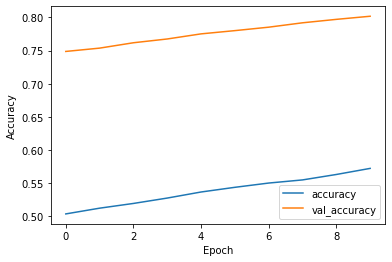

In [20]:
import matplotlib.pyplot as plt 

plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Accuracy:  0.8018


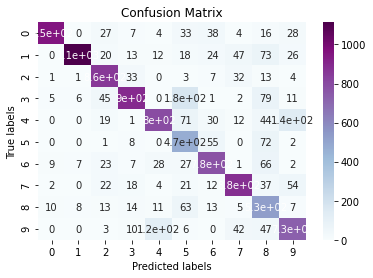

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns

def plot_conf(ypred,y_test):
    cf_matrix = confusion_matrix( ypred,y_test)
    ax= plt.subplot()
    sns.heatmap(cf_matrix,annot=True,ax=ax, cmap="BuPu")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')

y_pred=model.predict(x_test)
test_pred=np.argmax(y_pred,axis=1)
test_y=np.argmax(np.array(y_test),axis=1)
plot_conf(test_pred,test_y)
acc=accuracy_score(test_y, test_pred)
print("Accuracy: ", acc)

In [31]:
model.save('mnist.h5')


In [23]:
model = load_model('mnist.h5')

def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    img = img.reshape(1,28,28,1)
    img = img/255.0
    img = 1 - img
    #predicting
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

user-friendly GUI application

In [30]:
class App(tk.Tk):
    
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        # Creating elements
        self.canvas = tk.Canvas(self, width=400, height=400, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.btn_classify = tk.Button(self, text = "Recognise", command =self.classify_handwriting) 
        self.clear_button= tk.Button(self, text = "Clear",command = self.clear_all)
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.btn_classify.grid(row=1, column=1, pady=2, padx=2)
        self.clear_button.grid(row=1, column=0, pady=2)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
        
    def clear_all(self):
        self.canvas.delete("all")
        
    def classify_handwriting(self): 
        HWND = self.canvas.winfo_id()
        rect = win32gui.GetWindowRect(HWND)
        im = ImageGrab.grab(rect)
        digit, acc = predict_digit(im)  # call function to predict image
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
        
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
        
app = App()
app.mainloop()